<a href="https://colab.research.google.com/github/ImronRosada/Data_Science/blob/main/HW_Time_Series_Forecasting_ImronRosada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMRON ROSADA<BR>
DATA SCIENCE<BR>
TIME SERIES FORECASTING

## `DATA UNDERSTANDING`

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Load dataset

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

# where is your data path
#data_path = '/content/drive/My Drive/'

In [ ]:
#pd.set_option('display.max_colwidth', None)
#file_name = data_path + ''

In [ ]:
# List nama file
months = ["january", "february", "march", "april", "may", "june",
          "july", "august", "september", "october", "november", "december"]

# URL dataset
base_url = "https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/ecommerce_time_series_analysis/sales_data_{}_2019.csv"

df_list = [pd.read_csv(base_url.format(month)) for month in months]
df_all = pd.concat(df_list, ignore_index=True)

## `DATA PREPARATION`

In [ ]:
df_sales = df_all.copy()
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
# change to datetime
df_sales["Order Date"] = pd.to_datetime(df_sales["Order Date"], format="%m/%d/%y %H:%M", errors="coerce")

# cange to numeric
df_sales["Quantity Ordered"] = pd.to_numeric(df_sales["Quantity Ordered"], errors="coerce").astype("Int64")
df_sales["Price Each"] = pd.to_numeric(df_sales["Price Each"], errors="coerce")

In [ ]:
# Cek perubahan
df_sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered             Int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Duplicate Handling

In [ ]:
len(df_sales.drop_duplicates()) / len(df_sales)

0.9937811078405138

In [ ]:
display(df_sales.duplicated().sum())

1162

In [ ]:
duplicates = df_sales[df_sales.duplicated(keep=False)]
print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,<NA>,NaN,NaT,NaN
678,NaN,NaN,<NA>,NaN,NaT,NaN
797,NaN,NaN,<NA>,NaN,NaT,NaN
874,142071,AA Batteries (4-pack),1,3.84,2019-01-17 23:02:00,"131 2nd St, Boston, MA 02215"
875,142071,AA Batteries (4-pack),1,3.84,2019-01-17 23:02:00,"131 2nd St, Boston, MA 02215"
...,...,...,...,...,...,...
185481,Order ID,Product,<NA>,NaN,NaT,Purchase Address
185729,NaN,NaN,<NA>,NaN,NaT,NaN
185925,Order ID,Product,<NA>,NaN,NaT,Purchase Address
185955,Order ID,Product,<NA>,NaN,NaT,Purchase Address


Kemungkinan Data menunjukkan adanya duplikasi langsung, terutama pada Order ID, Product, dan Order Date, serta banyak baris yang seluruhnya kosong. Duplikasi ini kemungkinan terjadi akibat kesalahan input atau penggabungan dataset. Karena ini adalah duplikasi langsung, solusi terbaik adalah menghapus baris duplikat yang identik dan **hanya menyisakan satu**.

In [ ]:
df_sales[df_sales.duplicated(keep=False)].sort_values(by=['Order ID'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
874,142071,AA Batteries (4-pack),1,3.84,2019-01-17 23:02:00,"131 2nd St, Boston, MA 02215"
875,142071,AA Batteries (4-pack),1,3.84,2019-01-17 23:02:00,"131 2nd St, Boston, MA 02215"
4125,145143,Lightning Charging Cable,1,14.95,2019-01-06 03:01:00,"182 Jefferson St, San Francisco, CA 94016"
4126,145143,Lightning Charging Cable,1,14.95,2019-01-06 03:01:00,"182 Jefferson St, San Francisco, CA 94016"
5811,146765,Google Phone,1,600.00,2019-01-21 11:23:00,"918 Highland St, New York City, NY 10001"
...,...,...,...,...,...,...
184678,NaN,NaN,<NA>,NaN,NaT,NaN
184695,NaN,NaN,<NA>,NaN,NaT,NaN
185042,NaN,NaN,<NA>,NaN,NaT,NaN
185729,NaN,NaN,<NA>,NaN,NaT,NaN


In [ ]:
# hapus baris duplikat dan hanya menyisakan satu.
df_sales = df_sales.drop_duplicates()

In [ ]:
print(df_sales.shape)

(185688, 6)


In [ ]:
print(df_sales.duplicated().sum())

0


In [ ]:
duplicates = df_sales[df_sales.duplicated(keep=False)]
print("Baris dengan duplikat:")
display(duplicates)

Baris dengan duplikat:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Nilai pada tabel `kosong` menandakan sudah tidak ada baris yang duplikat

### Missing Value Handling

Handling missing values dalam Time Series Forecasting sedikit berbeda dibandingkan dengan dataset biasa. Pada time series, missing values harus diatasi dengan mempertahankan pola temporal agar tidak mengganggu model forecasting.

In [ ]:
df_sales[df_sales.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,<NA>,NaN,NaT,NaN
1073,Order ID,Product,<NA>,NaN,NaT,Purchase Address


- Baris 664 → Semua kolom NaN → Ini kemungkinan error input atau baris kosong.
- Baris 1073 → Order ID = "Order ID", Product = "Product", Order Date dan lainnya = NaN → Ini bisa jadi baris header yang salah terbaca sebagai data.

In [ ]:
df_sales.isnull().sum()

Order ID            1
Product             1
Quantity Ordered    2
Price Each          2
Order Date          2
Purchase Address    1
dtype: int64

In [ ]:
# Menghapus baris yang 100% kosong (seperti baris 664).
df_sales = df_sales.dropna(how='all')

In [ ]:
# Hapus Header yang Salah Terbaca
df_sales = df_sales[df_sales['Order ID'] != 'Order ID']

In [ ]:
print(df_sales.isnull().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [ ]:
df_sales[df_sales.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
total_rows = len(df_sales)

for column in df_sales.columns:
   # if column != 'customerID':
        missing_count = df_sales[column].isna().sum()
        missing_percentage = (missing_count / total_rows) * 100
        print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'Order ID' Has 0 missing values (0.00%)
Column 'Product' Has 0 missing values (0.00%)
Column 'Quantity Ordered' Has 0 missing values (0.00%)
Column 'Price Each' Has 0 missing values (0.00%)
Column 'Order Date' Has 0 missing values (0.00%)
Column 'Purchase Address' Has 0 missing values (0.00%)


Setelah melakukan missing value handling, kolom-kolom sekarang memiliki 0 missing values `0.00%` yang berarti tidak ada nilai yang hilang di dalam dataset

### Outlier Handling


In [ ]:
from scipy import stats
def check_plot(df_sales, variable):

    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_sales[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df_sales[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_sales[variable])
    plt.title('Boxplot')
    plt.show()

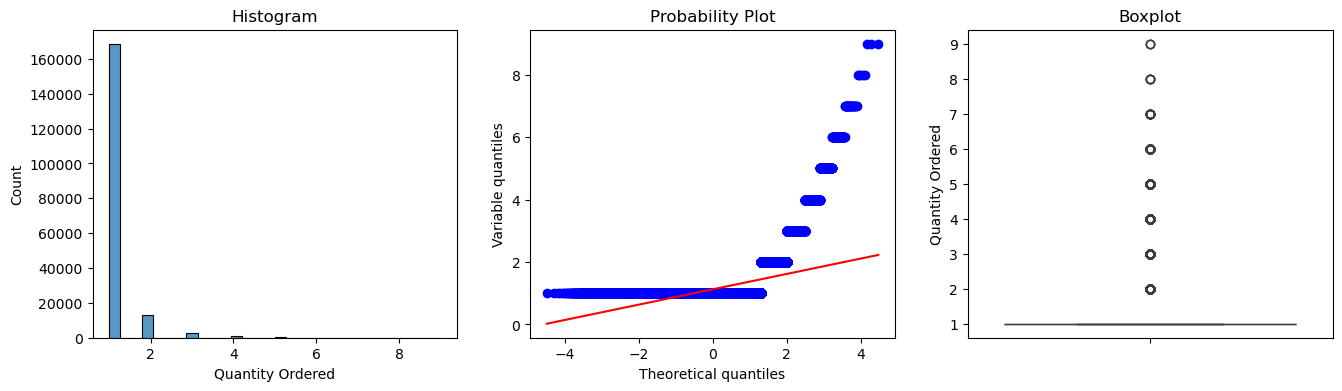

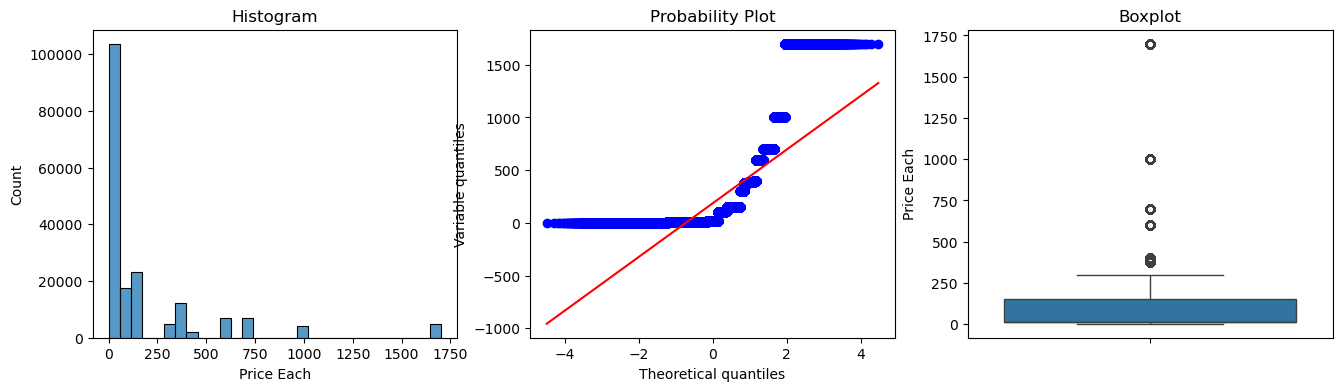

In [ ]:
# Memvisualisasikan outlier
for kolom in ['Quantity Ordered', 'Price Each']:
    df_sales = df_sales.copy()
    check_plot(df_sales, kolom)

In [ ]:
def calc_outliers(df_sales, column):
    q1 = df_sales[column].quantile(0.25)
    q3 = df_sales[column].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr

    print(f"\n[{column}]")
    print(f"Q1: {q1:.2f}, Median: {df_sales[column].median():.2f}, Q3: {q3:.2f}")
    print(f"Upper Fence: {upper_fence:.2f}, Lower Fence: {lower_fence:.2f}")
    print(f"Min: {df_sales[column].min():.2f}, Max: {df_sales[column].max():.2f}")

    outliers_upper = df_sales[df_sales[column] > upper_fence][column]
    outliers_lower = df_sales[df_sales[column] < lower_fence][column]

    print(f"Outliers di atas Upper Fence: {list(outliers_upper)}")
    print(f"Outliers di bawah Lower Fence: {list(outliers_lower)}")

# Daftar kolom yang akan dicek
columns_to_check = ['Quantity Ordered', 'Price Each']

for col in columns_to_check:
    calc_outliers(df_sales, col)


[Quantity Ordered]
Q1: 1.00, Median: 1.00, Q3: 1.00
Upper Fence: 1.00, Lower Fence: 1.00
Min: 1.00, Max: 9.00
Outliers di atas Upper Fence: [2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 4, 3, 2, 3, 2, 4, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 4, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 5, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 6, 3, 2, 3, 2, 2, 2, 2, 2, 3, 

In [ ]:
def check_outliers_zscore(df, column, window=30, threshold=3):
    df["rolling_mean"] = df[column].rolling(window=window, center=True).mean()
    df["rolling_std"] = df[column].rolling(window=window, center=True).std()

    df["z_score"] = (df[column] - df["rolling_mean"]) / df["rolling_std"]

    outliers = df[(df["z_score"].abs() > threshold)]
    print(f"\n[{column}]")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers[[column, "z_score"]].head())

# Cek outlier di "Quantity Ordered" dan "Price Each"
for col in ['Quantity Ordered', 'Price Each']:
    check_outliers_zscore(df_sales, col)



[Quantity Ordered]
Jumlah outlier: 5708
     Quantity Ordered   z_score
52                  3  3.454761
58                  3  3.454761
84                  3  3.108573
103                 5  4.992614
208                 2  3.678768

[Price Each]
Jumlah outlier: 5456
     Price Each   z_score
55       1700.0  4.959896
82       1700.0  4.279178
128      1700.0  4.874005
155      1700.0  4.071557
224      1700.0  3.935650


In [ ]:
df_sales[['Quantity Ordered', 'Price Each']].describe()

,Quantity Ordered,Price Each
count,185686.0,185686.000000
mean,1.124544,184.519255
std,0.443069,332.843838
min,1.0,2.990000
25%,1.0,11.950000
50%,1.0,14.950000
75%,1.0,150.000000
max,9.0,1700.000000


In [ ]:
df_sales[df_sales['Price Each'] == 1700]['Product'].value_counts()

Product
Macbook Pro Laptop    4721
Name: count, dtype: int64

In [ ]:
df_sales[df_sales['Price Each'] == 1700].fillna(0)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,rolling_mean,rolling_std,z_score
11,141245,Macbook Pro Laptop,1,1700.0,2019-01-31 10:12:00,"322 6th St, San Francisco, CA 94016",0.000000,0.000000,0.000000
55,141288,Macbook Pro Laptop,1,1700.0,2019-01-19 08:17:00,"789 Washington St, Los Angeles, CA 90001",127.830333,316.976335,4.959896
82,141314,Macbook Pro Laptop,1,1700.0,2019-01-13 23:51:00,"700 Jefferson St, New York City, NY 10001",164.940333,358.727698,4.279178
128,141360,Macbook Pro Laptop,1,1700.0,2019-01-17 21:00:00,"263 Meadow St, Los Angeles, CA 90001",132.163000,321.673266,4.874005
155,141385,Macbook Pro Laptop,1,1700.0,2019-01-10 12:59:00,"502 Walnut St, Atlanta, GA 30301",169.436000,375.916106,4.071557
...,...,...,...,...,...,...,...,...,...
186746,319570,Macbook Pro Laptop,1,1700.0,2019-12-09 17:40:00,"57 13th St, Boston, MA 02215",193.561667,350.175023,4.301958
186785,319607,Macbook Pro Laptop,1,1700.0,2019-12-25 20:07:00,"620 Church St, Atlanta, GA 30301",200.625333,407.130076,3.682790
186800,319622,Macbook Pro Laptop,1,1700.0,2019-12-15 07:11:00,"180 Ridge St, Boston, MA 02215",252.425333,448.105578,3.230432
186818,319639,Macbook Pro Laptop,1,1700.0,2019-12-20 10:56:00,"616 Highland St, Seattle, WA 98101",303.232000,443.725150,3.147822


Bukan kesalahan data → Harga MacBook memang mahal, jadi tidak perlu dihapus atau diubah.
Z-score tinggi karena harga jauh dari produk lain, tapi ini mungkin bukan kesalahan, hanya distribusi harga yang lebar.

In [ ]:
df_sales.describe().fillna(0)

,Quantity Ordered,Price Each,Order Date,rolling_mean,rolling_std,z_score
count,185686.0,185686.000000,185686,185657.000000,185657.000000,185657.000000
mean,1.124544,184.519255,2019-07-18 21:32:06.298051328,184.515112,316.580798,0.000374
min,1.0,2.990000,2019-01-01 03:07:00,24.855333,43.803059,-1.067760
25%,1.0,11.950000,2019-04-16 20:55:15,141.394667,229.987036,-0.557481
50%,1.0,14.950000,2019-07-17 20:11:00,179.056000,330.561880,-0.434244
75%,1.0,150.000000,2019-10-26 08:00:00,222.107333,382.121064,0.075514
max,9.0,1700.000000,2020-01-01 05:13:00,577.695667,709.514040,5.216798
std,0.443069,332.843838,0,60.005268,103.233223,0.984203


Mengecek outlier series time berdasarkan jumlah pesanan harian dengan metode Resampling

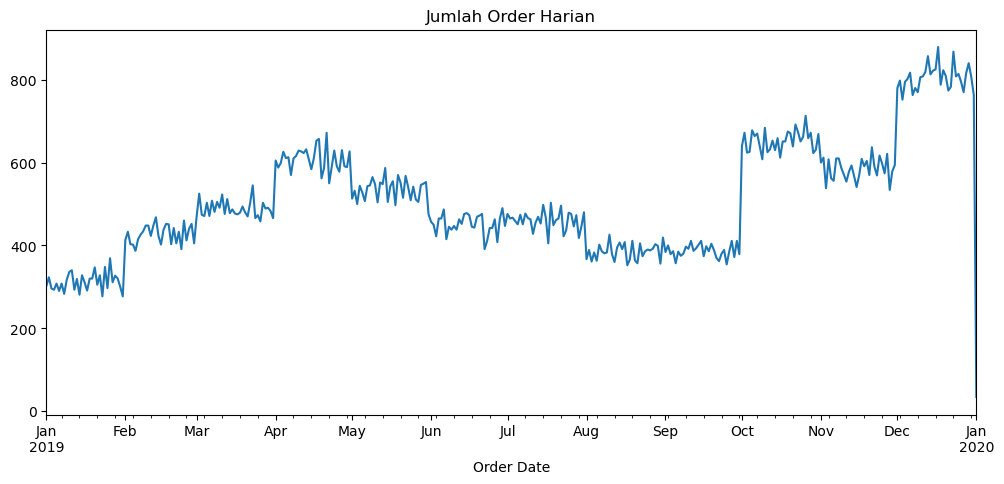

In [ ]:
plt.figure(figsize=(12, 5))
df_sales.resample('D', on='Order Date').size().plot()
plt.title("Jumlah Order Harian")
plt.show()

Untuk mengecek outlier dalam time series, harus mempertimbangkan pola waktu, bukan hanya statistik dasar. Rolling Z-Score digunakan untuk menyesuaikan dengan tren dan menghindari deteksi salah akibat perubahan musiman.

In [ ]:
daily_orders = df_sales.resample('D', on='Order Date').size()
daily_orders_mean = daily_orders.rolling(window=7, center=True).mean()
daily_orders_std = daily_orders.rolling(window=7, center=True).std()

z_scores = (daily_orders - daily_orders_mean) / daily_orders_std
outlier_dates = daily_orders[z_scores.abs() > 3]
print(outlier_dates)

Series([], Freq: D, dtype: int64)


Tidak ada tanggal dengan outlier berdasarkan Z-Score yang lebih besar dari 3 std dari rata-rata mean, yang berarti semua nilai berada dalam rentang yang normal jika dibandingkan dengan nilai rata-rata dan standar deviasi dari tren 7 hari sebelumnya.

In [ ]:
df_sales = df_sales.drop(columns=['rolling_mean', 'rolling_std', 'z_score'])

## `EXPLORATORY DATA ANALYSIS (EDA)`

In [ ]:
df_sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered             Int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [ ]:
# Filter data untuk tahun 2019
df_sales_2019 = df_sales[df_sales['Order Date'].dt.year == 2019]

In [ ]:
df_sales_2019[['Order Date']].value_counts().head(50).to_frame().T

Order Date,2019-12-15 20:16:00,2019-10-30 21:28:00,2019-12-11 13:24:00,2019-04-02 13:24:00,2019-12-20 18:57:00,2019-11-14 19:43:00,2019-05-14 18:36:00,2019-12-22 20:03:00,2019-04-08 13:26:00,2019-11-02 16:07:00,...,2019-12-11 18:04:00,2019-03-27 13:58:00,2019-10-05 17:57:00,2019-12-08 13:19:00,2019-04-21 18:57:00,2019-12-18 11:17:00,2019-12-15 18:49:00,2019-06-20 13:24:00,2019-02-18 21:52:00,2019-12-30 19:53:00
count,8,7,7,7,6,6,6,6,6,6,...,5,5,5,5,5,5,5,5,5,5


In [ ]:
# Total Revenue
df_sales_2019 = df_sales_2019.assign(Revenue=df_sales_2019['Quantity Ordered'] * df_sales_2019['Price Each'])
total_revenue = df_sales_2019['Revenue'].sum()
total_revenue


34456867.64999999

In [ ]:
# Hitung jumlah order
total_orders = df_sales_2019['Order ID'].nunique()
total_orders

178406

In [ ]:
# Hitung jumlah barang yang terjual
total_items_sold = df_sales_2019['Quantity Ordered'].sum()
total_items_sold

208771

In [ ]:
# Hitung rata-rata jumlah barang yang dibeli per transaksi
average_items_per_order = total_items_sold / total_orders
average_items_per_order

1.170201674831564

In [ ]:
# Hitung rata-rata spending per transaksi
average_spending_per_order = total_revenue / total_orders
average_spending_per_order

193.13738131004558

In [ ]:
print(f"{'Metrik':<50} {'Nilai'}")
print("-" * 65)
print(f"{'Total Revenue 2019':<50} {total_revenue}")
print(f"{'Jumlah Order 2019':<50} {total_orders}")
print(f"{'Jumlah Barang yang Terjual 2019':<50} {total_items_sold}")
print(f"{'Rata-rata Jumlah Barang per Transaksi 2019':<50} {average_items_per_order}")
print(f"{'Rata-rata Spending per Transaksi 2019':<50} {average_spending_per_order}")

Metrik                                             Nilai
-----------------------------------------------------------------
Total Revenue 2019                                 34456867.64999999
Jumlah Order 2019                                  178406
Jumlah Barang yang Terjual 2019                    208771
Rata-rata Jumlah Barang per Transaksi 2019         1.170201674831564
Rata-rata Spending per Transaksi 2019              193.13738131004558


In [ ]:
# Hitung GMV untuk setiap transaksi (jumlah spending)
df_sales_2019 = df_sales_2019.assign(GMV=df_sales_2019['Quantity Ordered'] * df_sales_2019['Price Each'])
df_GMV = df_sales_2019['GMV'].sum()
print(f"Gross Merchandise Value: {df_GMV:.2f}")


Gross Merchandise Value: 34456867.65


In [ ]:
# Agregasi berdasarkan rentang waktu

# a. Harian
daily_orders = df_sales_2019.resample('D', on='Order Date').agg(
    total_orders=('Order ID', 'nunique'),
    total_GMV=('GMV', 'sum')
)
daily_orders

,total_orders,total_GMV
Order Date,,
2019-01-01,287,65681.94
2019-01-02,308,70663.2
2019-01-03,286,47046.2
2019-01-04,282,62000.22
2019-01-05,301,46524.63
...,...,...
2019-12-27,734,126604.07
2019-12-28,789,133601.53
2019-12-29,800,156009.67


In [ ]:
# b. Mingguan
weekly_orders = df_sales_2019.resample('W', on='Order Date').agg(
    total_orders=('Order ID', 'nunique'),
    total_GMV=('GMV', 'sum')
)
weekly_orders.head(10)

,total_orders,total_GMV
Order Date,,
2019-01-06,1743,344678.73
2019-01-13,2104,409389.43
2019-01-20,2104,394921.11
2019-01-27,2134,426020.17
2019-02-03,2381,459570.62
2019-02-10,2832,565300.05
2019-02-17,2926,568199.28
2019-02-24,2880,535207.51
2019-03-03,3075,578306.44


In [ ]:
# c. Bulanan
monthly_orders = df_sales_2019.resample('ME', on='Order Date').agg(
    total_orders=('Order ID', 'nunique'),
    total_GMV=('GMV', 'sum')
)
monthly_orders

,total_orders,total_GMV
Order Date,,
2019-01-31,9262,1812742.87
2019-02-28,11496,2200078.08
2019-03-31,14549,2804973.35
2019-04-30,17528,3389217.98
2019-05-31,15836,3150616.23
2019-06-30,12989,2576280.15
2019-07-31,13761,2646461.32
2019-08-31,11484,2241083.37
2019-09-30,11202,2094465.69


In [ ]:
# 3 bulan terakhir tahun 2019
latest_date_2019 = df_sales_2019['Order Date'].max()
df_sales_3months = df_sales_2019[df_sales_2019['Order Date'] >= latest_date_2019 - pd.DateOffset(months=3)]
df_sales_3months

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,GMV
112515,248643,Lightning Charging Cable,1,14.95,2019-10-01 01:36:00,"321 Chestnut St, Austin, TX 73301",14.95,14.95
114081,250139,Google Phone,1,600.00,2019-10-01 00:53:00,"132 10th St, San Francisco, CA 94016",600.0,600.0
114082,250139,USB-C Charging Cable,1,11.95,2019-10-01 00:53:00,"132 10th St, San Francisco, CA 94016",11.95,11.95
114224,250275,ThinkPad Laptop,1,999.99,2019-10-01 00:46:00,"814 7th St, San Francisco, CA 94016",999.99,999.99
114648,250684,AAA Batteries (4-pack),1,2.99,2019-10-01 03:38:00,"985 Pine St, San Francisco, CA 94016",2.99,2.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,14.95
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,7.68
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.0,400.0
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,11.99


In [ ]:
top_10_products_2019 = (
    df_sales_3months.groupby('Product')['Revenue']
    .sum().sort_values(ascending=False).head(10)
)
print("Top 10 Produk (3 bulan terakhir tahun 2019)")
print("-" * 43)
print(top_10_products_2019)

Top 10 Produk (3 bulan terakhir tahun 2019)
-------------------------------------------
Product
Macbook Pro Laptop             2735300.0
iPhone                         1601600.0
ThinkPad Laptop               1371986.28
Google Phone                   1082400.0
27in 4K Gaming Monitor         841988.41
Apple Airpods Headphones        787950.0
34in Ultrawide Monitor          786579.3
Flatscreen TV                   493800.0
Bose SoundSport Headphones     453054.69
27in FHD Monitor               370325.31
Name: Revenue, dtype: Float64


In [ ]:
# Pisahkan kota dari 'Purchase Address'
df_sales_2019 = df_sales_2019.assign(City=df_sales_2019['Purchase Address'].apply(lambda x: x.split(', ')[1]))

In [ ]:
# Hitung jumlah order per kota
top_5_cities_orders = (
    df_sales_2019['City'].value_counts()
    .head(5)
)
top_5_cities_orders

City
San Francisco    44650
Los Angeles      29563
New York City    24837
Boston           19897
Atlanta          14863
Name: count, dtype: int64

In [ ]:
# Hitung total spending per kota
df_sales_2019 = df_sales_2019.assign(Revenue=df_sales_2019['Quantity Ordered'] * df_sales_2019['Price Each'])
top_5_cities_total_spending = (df_sales_2019.groupby('City')['Revenue'].sum().sort_values(ascending=False).head(5))
top_5_cities_total_spending

City
San Francisco    8252258.67
Los Angeles      5447304.29
New York City    4660526.52
Boston           3657300.76
Atlanta          2794199.07
Name: Revenue, dtype: Float64

In [ ]:
# Hitung rata-rata spending per order di tiap kota
top_5_cities_avg_spending = (df_sales_2019.groupby('City')['Revenue'].mean().sort_values(ascending=False).head(5))
top_5_cities_avg_spending

City
Atlanta          187.996977
New York City    187.644503
Dallas           186.796824
Seattle          186.575315
Portland         186.324331
Name: Revenue, dtype: Float64

In [ ]:
# Header tabel
print(f"{'Top 5 Kota (Order Terbanyak)':<41} || {'Top 5 Kota (Total Spending)':<41} || {'Top 5 Kota (Avg Spending)':<30}")
print("=" * 131)
for i in range(5):
    kota_orders = top_5_cities_orders.iloc[i]
    kota_spending = top_5_cities_total_spending.iloc[i]
    kota_avg_spending = top_5_cities_avg_spending.iloc[i]
    print(f"{top_5_cities_orders.index[i]:<30} {kota_orders:<10} || "
          f"{top_5_cities_total_spending.index[i]:<30} {kota_spending:.2f} || "
          f"{top_5_cities_avg_spending.index[i]:<30} {kota_avg_spending:.6f}")

Top 5 Kota (Order Terbanyak)              || Top 5 Kota (Total Spending)               || Top 5 Kota (Avg Spending)     
San Francisco                  44650      || San Francisco                  8252258.67 || Atlanta                        187.996977
Los Angeles                    29563      || Los Angeles                    5447304.29 || New York City                  187.644503
New York City                  24837      || New York City                  4660526.52 || Dallas                         186.796824
Boston                         19897      || Boston                         3657300.76 || Seattle                        186.575315
Atlanta                        14863      || Atlanta                        2794199.07 || Portland                       186.324331


In [ ]:
# Ekstrak Jam dari Order Date
df_sales_2019['Order Hour'] = df_sales_2019['Order Date'].dt.hour

In [ ]:
# Hitung Total Order per Jam
hourly_sales = df_sales_2019.groupby('Order Hour').agg(
    total_orders=('Order ID', 'nunique'),
    total_revenue=('Revenue', 'sum')
).reset_index()
hourly_sales

,Order Hour,total_orders,total_revenue
0,0,3748,710887.98
1,1,2246,458258.99
2,2,1192,232574.51
3,3,801,144683.04
4,4,810,162281.15
5,5,1258,230549.93
6,6,2375,447963.01
7,7,3836,744067.32
8,8,6036,1192309.2
9,9,8404,1638784.04


In [ ]:
rush_hour = hourly_sales.sort_values(by='total_orders', ascending=False).head(3)
rush_hour

,Order Hour,total_orders,total_revenue
19,19,12377,2411971.14
12,12,12082,2314359.85
11,11,11882,2296619.84


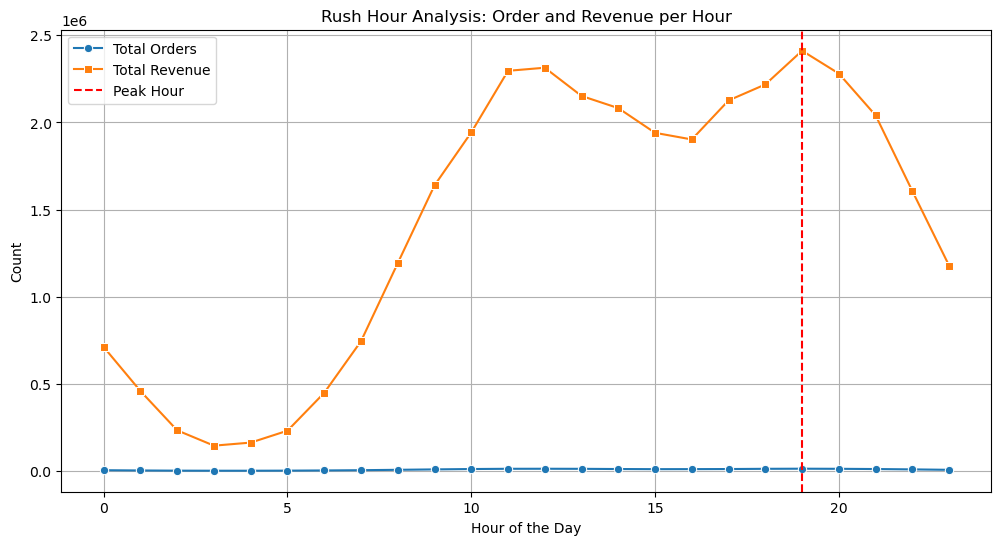

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_sales, x='Order Hour', y='total_orders', marker='o', label='Total Orders')
sns.lineplot(data=hourly_sales, x='Order Hour', y='total_revenue', marker='s', label='Total Revenue')

plt.axvline(rush_hour.iloc[0]['Order Hour'], color='red', linestyle='--', label='Peak Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Rush Hour Analysis: Order and Revenue per Hour')
plt.legend()
plt.grid()
plt.show()


Periode waktu dengan aktivitas transaksi tertinggi terjadi pada pukul 19:00, 12:00, dan 11:00, dengan puncaknya di 19:00. Aktivitas tinggi kemungkinan dipengaruhi oleh waktu setelah kerja dan jam istirahat.

## `MODEL PREPARATION`

In [ ]:
# Agregasi data transaksi harian dan seeting Order Date sebagai index
df_daily_sales = df_sales.resample('D', on='Order Date').agg(
    total_orders=('Order ID', 'nunique')
)
df_daily_sales

,total_orders
Order Date,
2019-01-01,287
2019-01-02,308
2019-01-03,286
2019-01-04,282
2019-01-05,301
...,...
2019-12-28,789
2019-12-29,800
2019-12-30,774


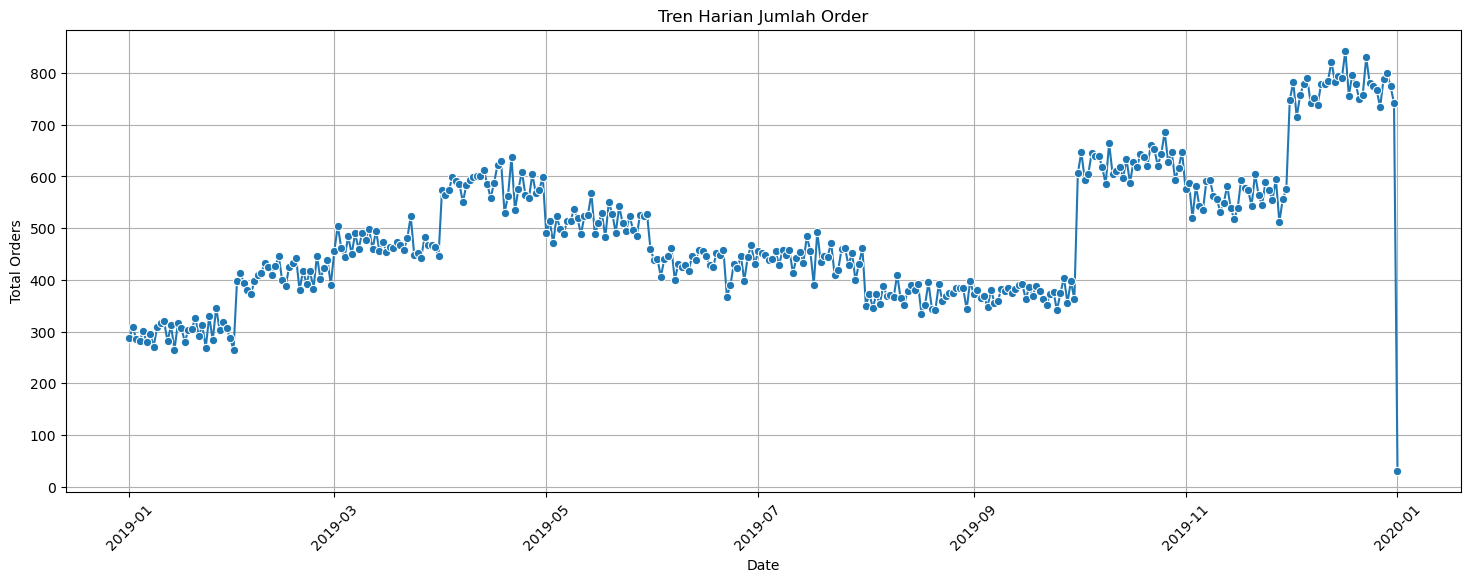

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_daily_sales, x='Order Date', y='total_orders', marker='o')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.title('Tren Harian Jumlah Order')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Terjadi penurunan jumlah order secara signifikan (hanya 31 order) pada awal tahun 2020. Kemungkinan besar ini disebabkan oleh faktor musiman, terutama Hari libur Tahun Baru, Tren musiman tahunan atau Efek pasca-peak season (Desember).

## `MODELING`

Model forecasting akan dibuat untuk memprediksi jumlah transaksi selama satu bulan ke depan berdasarkan data harian. Tiga model yang digunakan adalah **TBATS**, **AutoETS** dan **Prophet**. Model terbaik dipilih berdasarkan **MAPE** terkecil untuk memberikan hasil prediksi yang lebih akurat.

In [ ]:
#!pip install sktime[all_extras]

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split, ForecastingGridSearchCV, SlidingWindowSplitter
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.ets import AutoETS
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller
# time series modeling
import statsmodels.api as sm
from sktime.utils.plotting import plot_series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
import warnings
warnings.simplefilter("ignore")

**Train-test split**

In [ ]:
# Split untuk training dan testing.
y_train, y_test = temporal_train_test_split(df_daily_sales['total_orders'], test_size=35)
# y_train, y_test = temporal_train_test_split(df_daily_sales['total_orders'], test_size=30)

In [ ]:
print(y_train.index.dtype, y_test.index.dtype)

datetime64[ns] datetime64[ns]


In [ ]:
# Cek apakah data stationer dengan ADF Test
#def adf_test(series):
#    result = adfuller(series.dropna())
#   print(f"ADF Statistic: {result[0]}")
#    print(f"p-value: {result[1]}")
#    return result[1]  # p-value

In [ ]:
# Jika data tidak stationer, gunakan differencing
# p_value = adf_test(y_train)
# if p_value > 0.05:
#    y_train = y_train.diff().dropna()
#    y_test = y_test.diff().dropna()
#    print("ADF setelah differencing:")
#    adf_test(y_train)

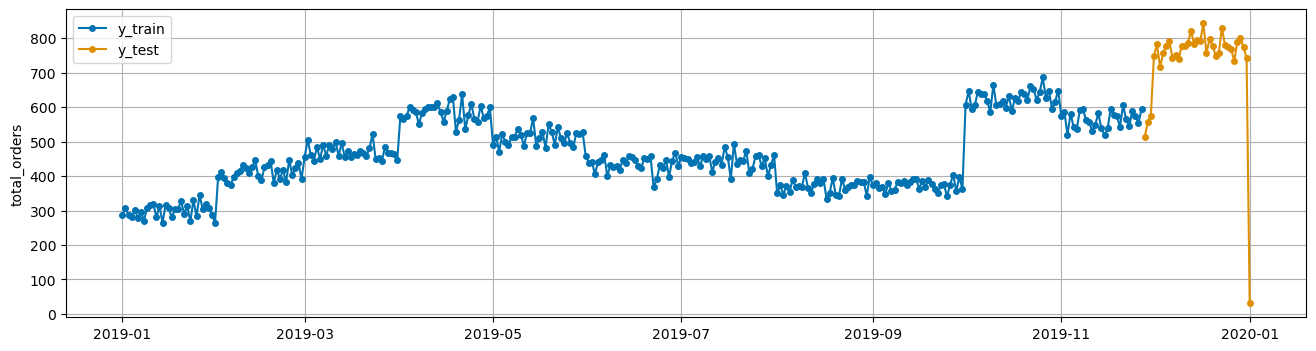

In [ ]:
# check the time series after splitting
fig, ax = plot_series(y_train, y_test, labels=["y_train", "y_test"])
ax.grid(True)

<Axes: >

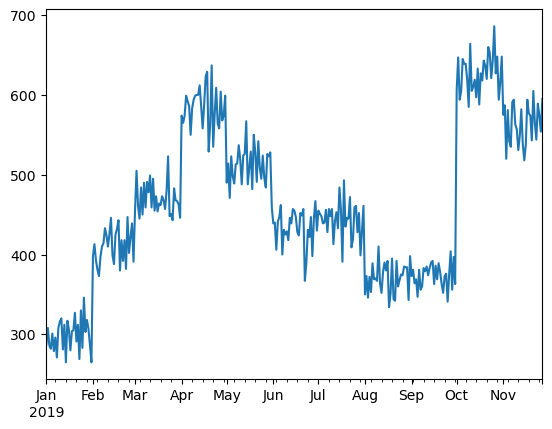

In [ ]:
y_train.plot()

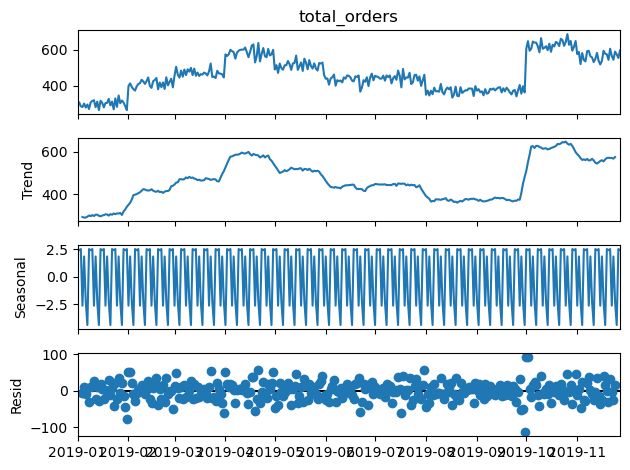

In [ ]:
decompose_result = seasonal_decompose(y_train, period=7)
fig = decompose_result.plot()
plt.show()

In [ ]:
df_decompose = pd.DataFrame({
    'Observed': decompose_result.observed.fillna(0),
    'Trend': decompose_result.trend.fillna(0),
    'Seasonal': decompose_result.seasonal.fillna(0),
    'Residual': decompose_result.resid.fillna(0)
})
df_decompose.T.style.set_sticky()

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00,2019-01-06 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,2019-01-11 00:00:00,2019-01-12 00:00:00,2019-01-13 00:00:00,2019-01-14 00:00:00,2019-01-15 00:00:00,2019-01-16 00:00:00,2019-01-17 00:00:00,2019-01-18 00:00:00,2019-01-19 00:00:00,2019-01-20 00:00:00,2019-01-21 00:00:00,2019-01-22 00:00:00,2019-01-23 00:00:00,2019-01-24 00:00:00,2019-01-25 00:00:00,2019-01-26 00:00:00,2019-01-27 00:00:00,2019-01-28 00:00:00,2019-01-29 00:00:00,2019-01-30 00:00:00,2019-01-31 00:00:00,2019-02-01 00:00:00,2019-02-02 00:00:00,2019-02-03 00:00:00,2019-02-04 00:00:00,2019-02-05 00:00:00,2019-02-06 00:00:00,2019-02-07 00:00:00,2019-02-08 00:00:00,2019-02-09 00:00:00,2019-02-10 00:00:00,2019-02-11 00:00:00,2019-02-12 00:00:00,2019-02-13 00:00:00,2019-02-14 00:00:00,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,2019-02-22 00:00:00,2019-02-23 00:00:00,2019-02-24 00:00:00,2019-02-25 00:00:00,2019-02-26 00:00:00,2019-02-27 00:00:00,2019-02-28 00:00:00,2019-03-01 00:00:00,2019-03-02 00:00:00,2019-03-03 00:00:00,2019-03-04 00:00:00,2019-03-05 00:00:00,2019-03-06 00:00:00,2019-03-07 00:00:00,2019-03-08 00:00:00,2019-03-09 00:00:00,2019-03-10 00:00:00,2019-03-11 00:00:00,2019-03-12 00:00:00,2019-03-13 00:00:00,2019-03-14 00:00:00,2019-03-15 00:00:00,2019-03-16 00:00:00,2019-03-17 00:00:00,2019-03-18 00:00:00,2019-03-19 00:00:00,2019-03-20 00:00:00,2019-03-21 00:00:00,2019-03-22 00:00:00,2019-03-23 00:00:00,2019-03-24 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-03-30 00:00:00,2019-03-31 00:00:00,2019-04-01 00:00:00,2019-04-02 00:00:00,2019-04-03 00:00:00,2019-04-04 00:00:00,2019-04-05 00:00:00,2019-04-06 00:00:00,2019-04-07 00:00:00,2019-04-08 00:00:00,2019-04-09 00:00:00,2019-04-10 00:00:00,2019-04-11 00:00:00,2019-04-12 00:00:00,2019-04-13 00:00:00,2019-04-14 00:00:00,2019-04-15 00:00:00,2019-04-16 00:00:00,2019-04-17 00:00:00,2019-04-18 00:00:00,2019-04-19 00:00:00,2019-04-20 00:00:00,2019-04-21 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00,2019-04-26 00:00:00,2019-04-27 00:00:00,2019-04-28 00:00:00,2019-04-29 00:00:00,2019-04-30 00:00:00,2019-05-01 00:00:00,2019-05-02 00:00:00,2019-05-03 00:00:00,2019-05-04 00:00:00,2019-05-05 00:00:00,2019-05-06 00:00:00,2019-05-07 00:00:00,2019-05-08 00:00:00,2019-05-09 00:00:00,2019-05-10 00:00:00,2019-05-11 00:00:00,2019-05-12 00:00:00,2019-05-13 00:00:00,2019-05-14 00:00:00,2019-05-15 00:00:00,2019-05-16 00:00:00,2019-05-17 00:00:00,2019-05-18 00:00:00,2019-05-19 00:00:00,2019-05-20 00:00:00,2019-05-21 00:00:00,2019-05-22 00:00:00,2019-05-23 00:00:00,2019-05-24 00:00:00,2019-05-25 00:00:00,2019-05-26 00:00:00,2019-05-27 00:00:00,2019-05-28 00:00:00,2019-05-29 00:00:00,2019-05-30 00:00:00,2019-05-31 00:00:00,2019-06-01 00:00:00,2019-06-02 00:00:00,2019-06-03 00:00:00,2019-06-04 00:00:00,2019-06-05 00:00:00,2019-06-06 00:00:00,2019-06-07 00:00:00,2019-06-08 00:00:00,2019-06-09 00:00:00,2019-06-10 00:00:00,2019-06-11 00:00:00,2019-06-12 00:00:00,2019-06-13 00:00:00,2019-06-14 00:00:00,2019-06-15 00:00:00,2019-06-16 00:00:00,2019-06-17 00:00:00,2019-06-18 00:00:00,2019-06-19 00:00:00,2019-06-20 00:00:00,2019-06-21 00:00:00,2019-06-22 00:00:00,2019-06-23 00:00:00,2019-06-24 00:00:00,2019-06-25 00:00:00,2019-06-26 00:00:00,2019-06-27 00:00:00,2019-06-28 00:00:00,2019-06-29 00:00:00,2019-06-30 00:00:00,2019-07-01 00:00:00,2019-07-02 00:00:00,2019-07-03 00:00:00,2019-07-04 00:00:00,2019-07-05 00:00:00,2019-07-06 00:00:00,2019-07-07 00:00:00,2019-07-08 00:00:00,2019-07-09 00:00:00,2019-07-10 00:00:00,2019-07-11 00:00:00,2019-07-12 00:00:00,2019-07-13 00:00:00,2019-07-14 00:00:00,2019-07-15 00:00:00,2019-07-16 00:00:00,2019-07-17 00:00:00,2019-07-18 00:00:00,2019-07-19 00:00:00

- Ada pola musiman dengan periode 7 hari, Nilai Seasonal untuk setiap hari dalam seminggu selalu berulang setiap 7 hari.

**Forecasting Horizon** (fh) adalah titik waktu di mana jika kita ingin memprediksi ke depan.

In [ ]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
#fh = ForecastingHorizon(pd.date_range(start=y_train.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'), is_relative=False)

In [ ]:
fh

ForecastingHorizon(['2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
               '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09',
               '2019-12-10', '2019-12-11', '2019-12-12', '2019-12-13',
               '2019-12-14', '2019-12-15', '2019-12-16', '2019-12-17',
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-21',
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', freq='D', is_relative=False)

**Modeling**

Asumsikan pola musima ex: (sp=7/14/30).

In [ ]:
# Model (TBATS)
tbats_forecaster = TBATS(sp=7, use_trend=True, use_arma_errors=False, use_damped_trend=True, use_box_cox=True)
tbats_forecaster.fit(y_train)

TBATS(sp=7, use_arma_errors=False, use_box_cox=True, use_damped_trend=True,
      use_trend=True)

In [ ]:
# Model AutoETS
autoets_forecaster = AutoETS(auto=False, sp=7, error="add", trend="add", seasonal="mul", damped_trend=True, n_jobs=-1)
autoets_forecaster.fit(y_train)


AutoETS(damped_trend=True, n_jobs=-1, seasonal='mul', sp=7, trend='add')

In [ ]:
# Model Prophet
prophet_data = y_train.reset_index()
prophet_data.columns = ['ds', 'y']
#holidays = pd.DataFrame({
#    'holiday': 'new_year',
#    'ds': pd.to_datetime(['2020-01-01']),
#    'lower_window': -1,
 #   'upper_window': 1
#})
prophet_forecaster = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode='multiplicative', changepoint_prior_scale=0.7)
# prophet_forecaster = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode='multiplicative', changepoint_prior_scale=0.05, holiday=holidays)
prophet_forecaster.add_seasonality(name='monthly', period=30, fourier_order=10)
prophet_forecaster.fit(prophet_data)

10:03:28 - cmdstanpy - INFO - Chain [1] start processing
10:03:30 - cmdstanpy - INFO - Chain [1] done processing


**Prediction**

In [ ]:
# do prediction based on forecast horizon we already defined
y_pred_tbats = tbats_forecaster.predict(fh=fh)
y_pred_autoets = autoets_forecaster.predict(fh=fh)

# Prediksi Prophet
future = pd.DataFrame({'ds': y_test.index})
y_pred_prophet = prophet_forecaster.predict(future)[['ds', 'yhat']]
y_pred_prophet.set_index('ds', inplace=True)
y_pred_prophet = y_pred_prophet['yhat']

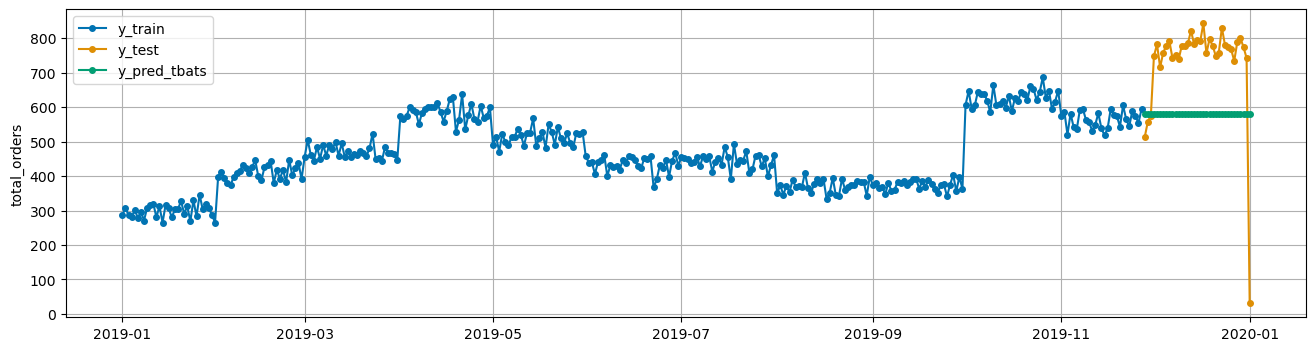

In [ ]:
fig, ax = plot_series(y_train, y_test, y_pred_tbats, labels=["y_train", "y_test", "y_pred_tbats"]);
ax.grid(True)

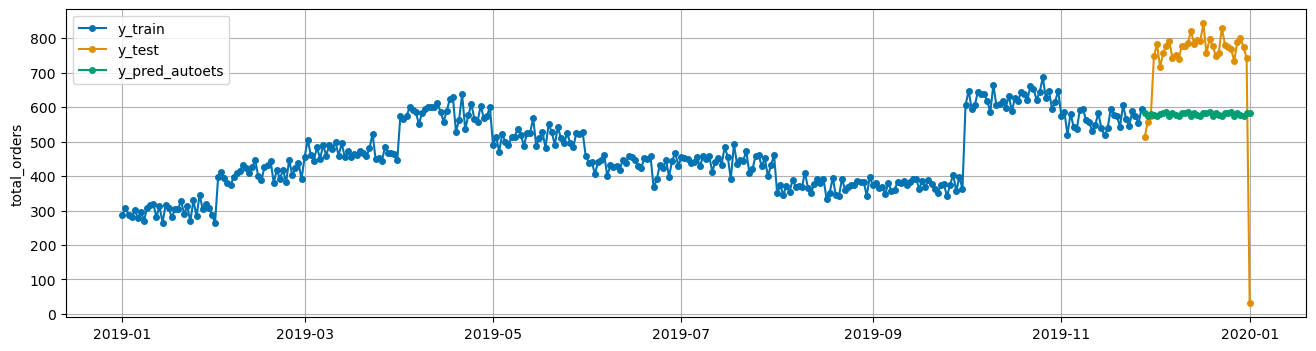

In [ ]:
fig, ax = plot_series(y_train, y_test, y_pred_autoets, labels=["y_train", "y_test", "y_pred_autoets"]);
ax.grid(True)

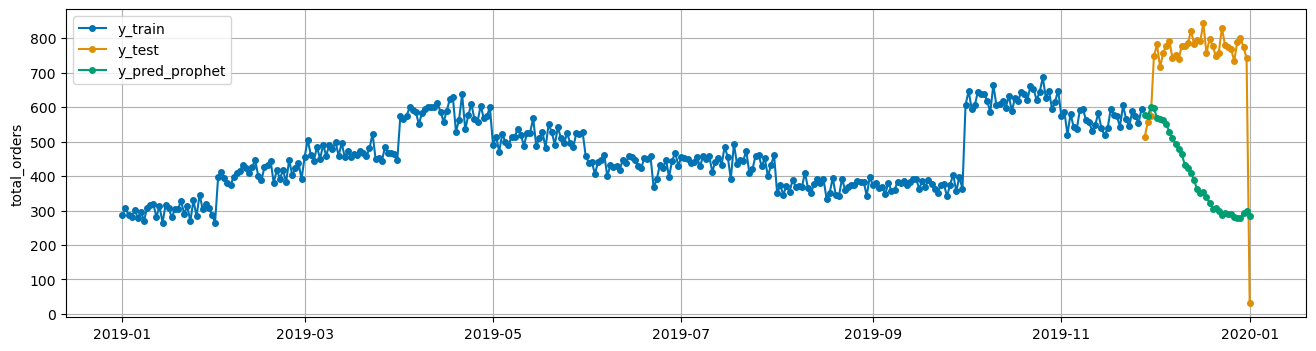

In [ ]:
fig, ax = plot_series(y_train, y_test, y_pred_prophet, labels=["y_train", "y_test", "y_pred_prophet"]);
ax.grid(True)

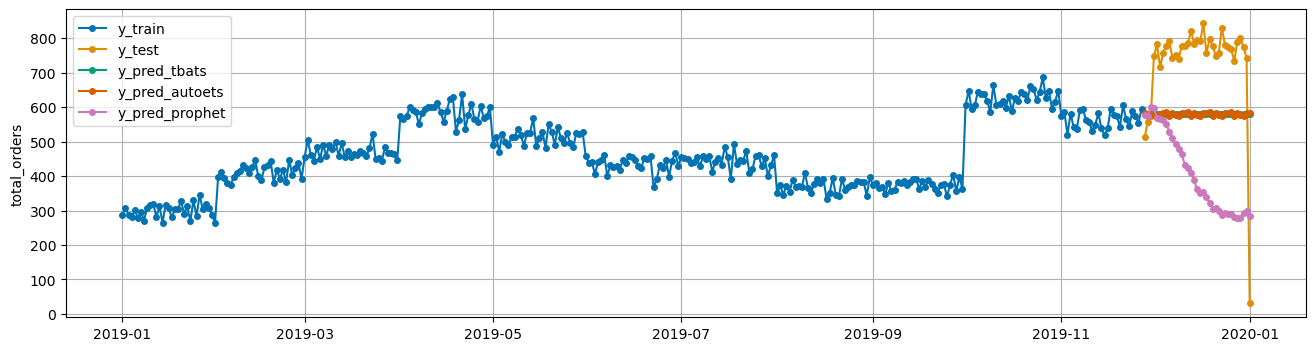

In [ ]:
fig, ax = plot_series(y_train, y_test, y_pred_tbats, y_pred_autoets, y_pred_prophet, labels=["y_train", "y_test", "y_pred_tbats", "y_pred_autoets", "y_pred_prophet"]);
ax.grid(True)

**Check Model Specs**

In [ ]:
tbats_forecaster._forecaster

In [ ]:
autoets_forecaster.get_fitted_params()
print(autoets_forecaster.summary())


                                 ETS Results                                  
Dep. Variable:           total_orders   No. Observations:                  331
Model:                      ETS(AAdM)   Log Likelihood               -1629.118
Date:                Thu, 06 Mar 2025   AIC                           3286.235
Time:                        09:57:02   BIC                           3339.465
Sample:                    01-01-2019   HQIC                          3307.465
                         - 11-27-2019   Scale                         1102.939
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4421      0.118      3.739      0.000       0.210       0.674
smoothing_trend        0.0473      0.099      0.478      0.633      -0.147       0.241
smoothing_seasonal  

In [ ]:
print(prophet_forecaster.params)

OrderedDict({'lp__': array([[887.437]]), 'k': array([[-0.131049]]), 'm': array([[0.0353274]]), 'delta': array([[ 0.357384  , -0.0176666 , -0.392121  ,  0.00716395,  0.467217  ,
         0.0503578 , -0.0102091 ,  0.025245  , -0.337795  ,  0.106468  ,
        -0.737339  ,  0.431447  , -0.108083  ,  0.0466394 ,  0.575081  ,
        -0.52414   , -0.101453  ,  0.498821  ,  0.141268  , -0.26676   ,
         0.145252  ,  0.02653   ,  0.869511  ,  0.0218903 , -1.48848   ]]), 'sigma_obs': array([[0.0401344]]), 'beta': array([[-3.25471e-01,  2.73348e-01, -3.66151e-02, -8.85206e-02,
         2.00432e-02,  2.19938e-02, -4.92540e-02,  2.85606e-02,
         4.33697e-02, -7.65481e-02,  2.46088e-02,  1.23272e-02,
        -1.68358e-01,  5.19914e-03, -3.13908e-02, -1.04672e-02,
         2.95590e-02,  2.28669e-02, -3.61250e-02,  3.28997e-02,
         2.95182e+00, -5.64614e-01,  1.64712e-01,  2.56916e+00,
        -1.16777e-01, -1.94283e+00, -1.01804e-03, -5.76932e-01,
        -7.29213e-01,  1.25741e-01,  

Untuk memastikan model yang terbaik, evaluasi dengan metrik error (misalnya `MAPE`) perlu dilakukan untuk membandingkan performa model.

## `MODEL DIAGNOSTICS`

Memastikan bahwa asumsi model terpenuhi sebelum masuk ke evaluasi performa secara kuantitatif.

In [ ]:
# find residuals
residuals_tbats = y_test - y_pred_tbats
residuals_autoets = y_test - y_pred_autoets
residuals_prophet = y_test - y_pred_prophet

**Plot Residuals**

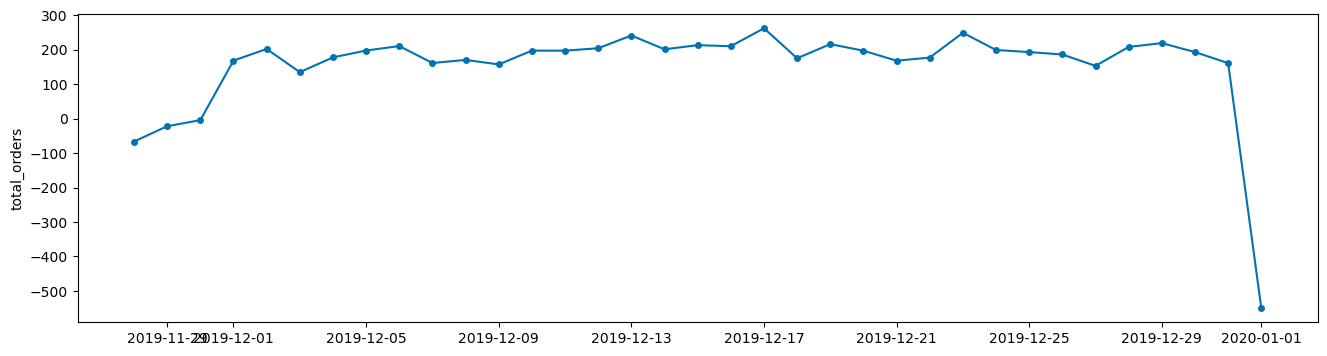

In [ ]:
# Model AutoARIMA (ARIMA)
plot_series(residuals_tbats);

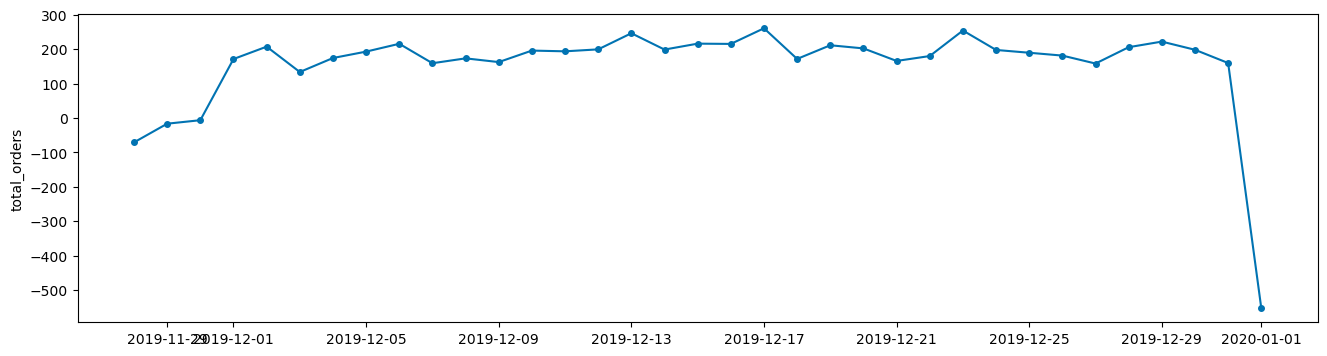

In [ ]:
# Model ETS (Exponential Smoothing)
plot_series(residuals_autoets);

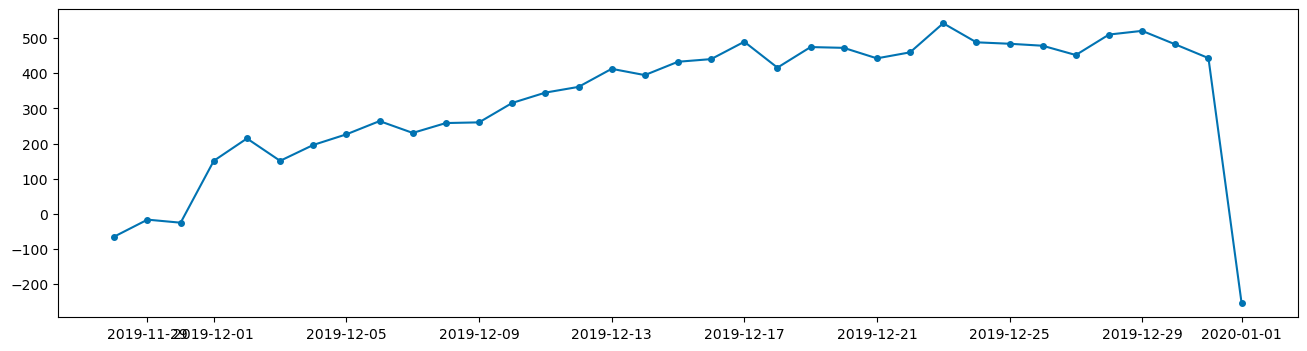

In [ ]:
plot_series(residuals_prophet);

**Normality of Residuals**

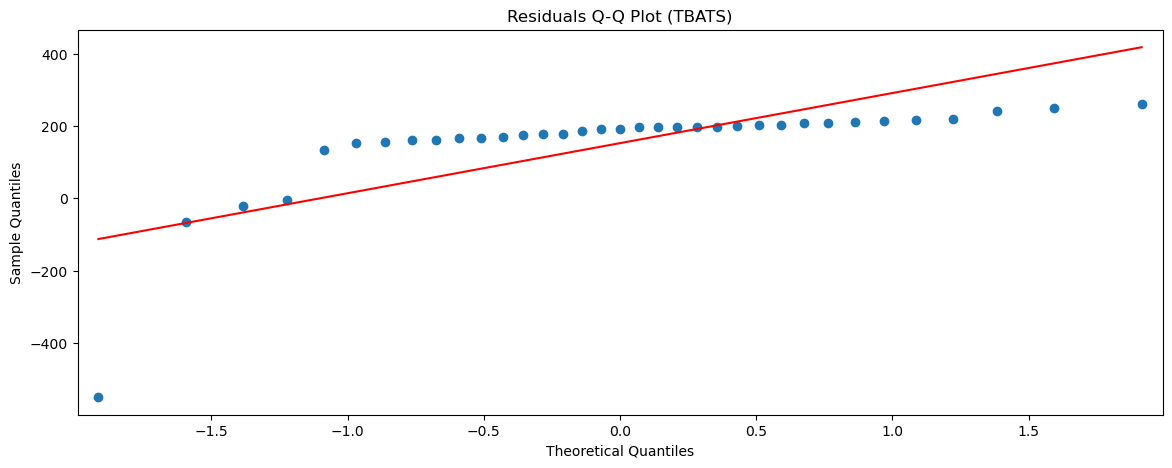

In [ ]:
sm.qqplot(residuals_tbats, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot (TBATS)")
plt.show()

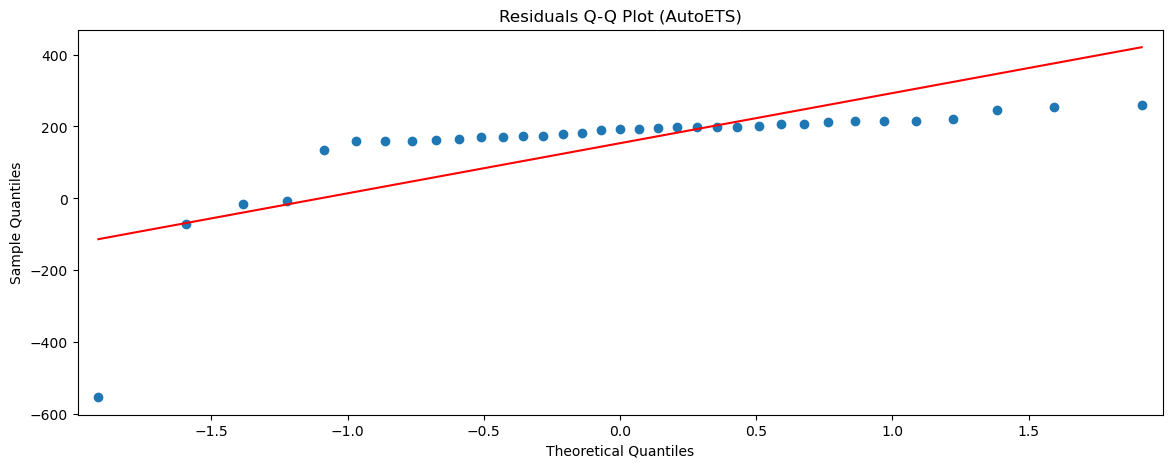

In [ ]:
sm.qqplot(residuals_autoets, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot (AutoETS)")
plt.show()

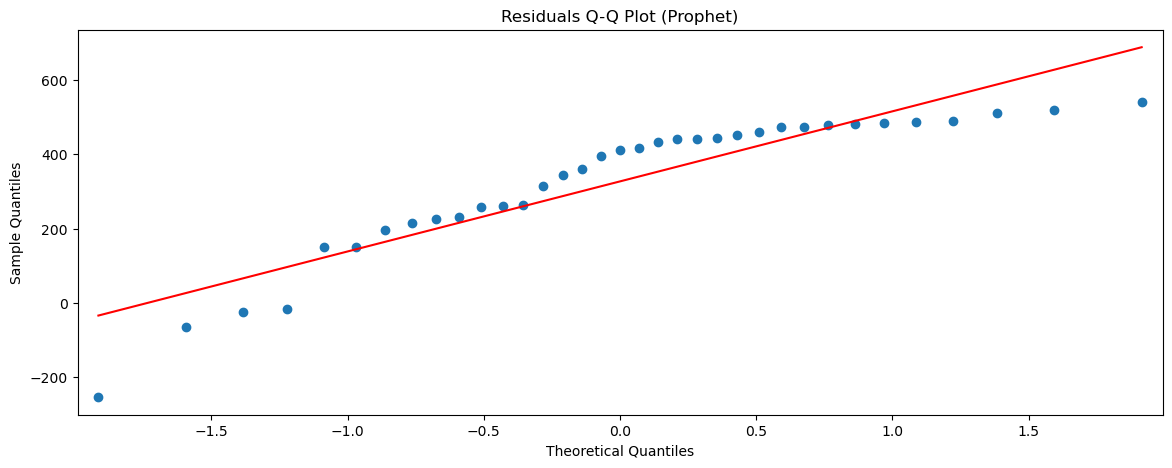

In [ ]:
sm.qqplot(residuals_prophet, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot (Prophet)")
plt.show()

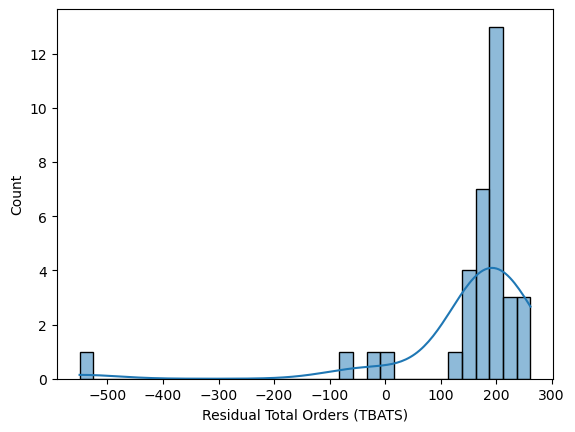

In [ ]:
sns.histplot(residuals_tbats, kde=True)
plt.xlabel("Residual Total Orders (TBATS)")
plt.show()

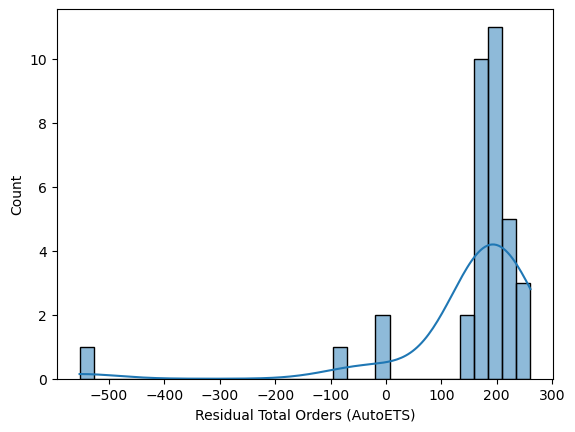

In [ ]:
sns.histplot(residuals_autoets, kde=True)
plt.xlabel("Residual Total Orders (AutoETS)")
plt.show()

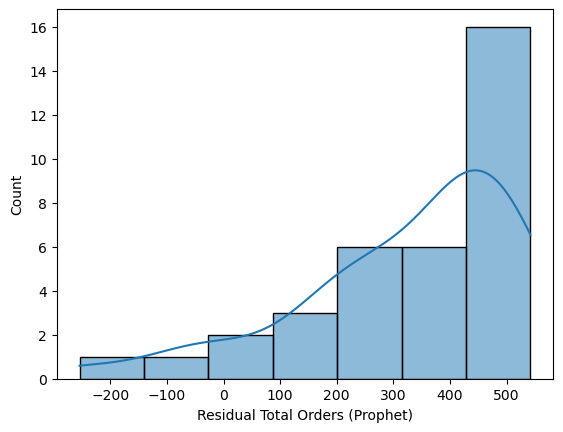

In [ ]:
sns.histplot(residuals_prophet, kde=True)
plt.xlabel("Residual Total Orders (Prophet)")
plt.show()

In [ ]:
print(len(residuals_tbats))
lags_to_use = min(30, len(residuals_tbats) - 1)

35


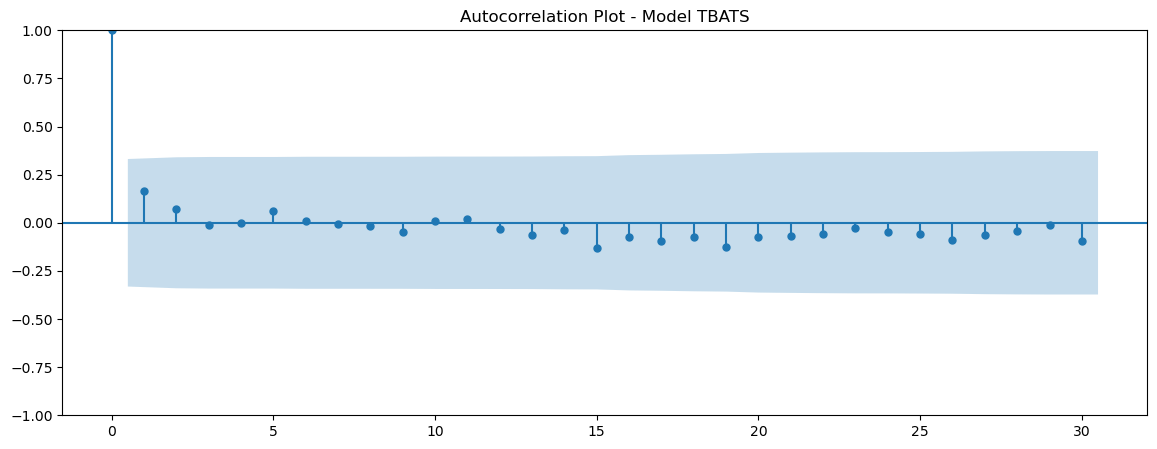

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
plot_acf(residuals_tbats, lags=lags_to_use, ax=ax)
ax.set_title("Autocorrelation Plot - Model TBATS", fontsize=12)
plt.show()

In [ ]:
print(len(residuals_autoets))
lags_to_use = min(30, len(residuals_autoets) - 1)

35


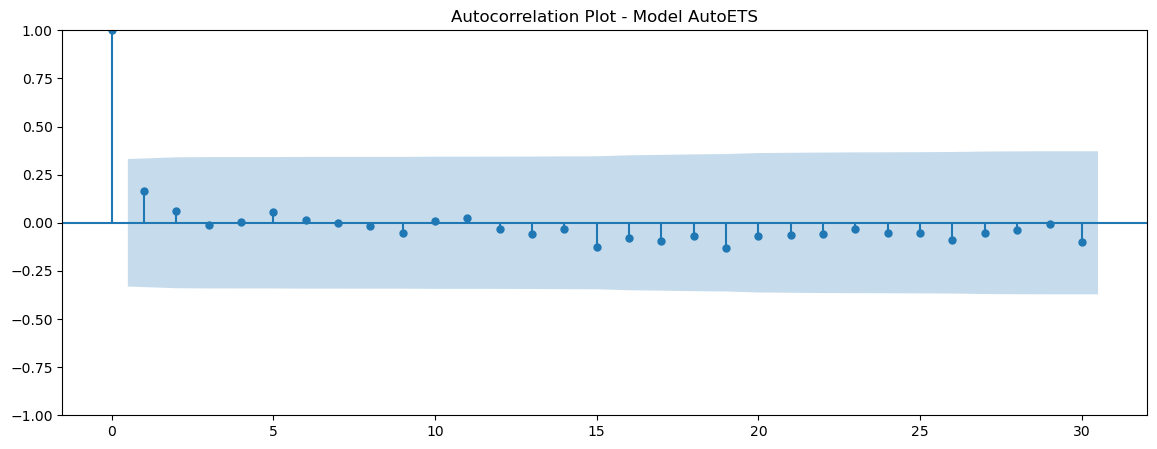

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
plot_acf(residuals_autoets, lags=lags_to_use, ax=ax)
ax.set_title("Autocorrelation Plot - Model AutoETS", fontsize=12)
plt.show()

In [ ]:
print(len(residuals_prophet))
lags_to_use = min(30, len(residuals_prophet) - 1)

35


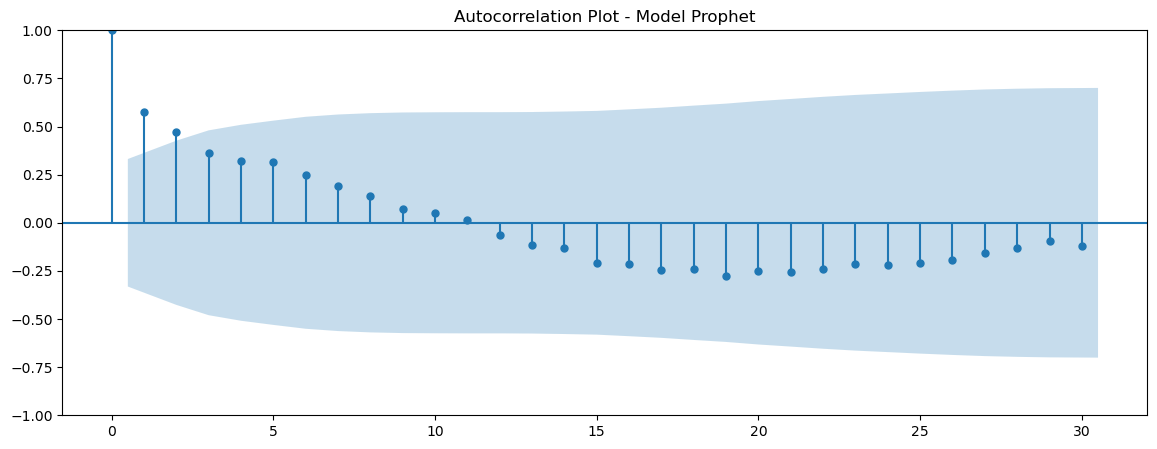

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
plot_acf(residuals_prophet, lags=lags_to_use, ax=ax)
ax.set_title("Autocorrelation Plot - Model Prophet", fontsize=12)
plt.show()

## `MODEL EVALUATION`

In [ ]:
mape_tbats = mean_absolute_percentage_error(y_test, y_pred_tbats)*100
mape_tbats

73.24691119324459

In [ ]:
mape_autoets = mean_absolute_percentage_error(y_test, y_pred_autoets)*100
mape_autoets

73.62573791914713

In [ ]:
mape_prophet = mean_absolute_percentage_error(y_test, y_pred_prophet)*100
mape_prophet

67.3944231503089

| Model  | MAPE (%) |
|--------|---------|
| TBATS  | 73.24   |
| AutoETS| 73.62   |
| Prophet| 67.39   |


Model **Prophet** memiliki MAPE lebih kecil dibandingkan Model lainya, Namun, nilai MAPE masih cukup tinggi, sehingga perlu dilakukan penyesuaian model jika tren kenaikan terjadi.

**Rekomendasi Bisnis**

- Optimasi Sumber Daya: Sesuaikan tenaga kerja, layanan pelanggan, dan stok barang jika ada tren kenaikan.
- Promosi & Pemasaran: Tingkatkan kampanye saat tren naik untuk memaksimalkan keuntungan.
- Perencanaan Operasional: Gunakan forecast untuk penjadwalan shift, inventaris, dan kapasitas sistem.
- Monitoring & Penyesuaian: Pantau real-time dan perbarui model secara berkala untuk akurasi peramalan.